In [2]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import ta

In [3]:
df = yf.download('SQ',start='2019-01-01')

[*********************100%***********************]  1 of 1 completed


In [6]:
df['SMA_20'] = df.Close.rolling(20).mean()
df['Vol'] = df.Close.rolling(20).std()
df['upper_bb'] = df.SMA_20 + (2*df.Vol)
df['lower_bb'] = df.SMA_20 - (2*df.Vol)

In [12]:
df['rsi'] = ta.momentum.rsi(df.Close, window = 6)
conditions = [(df.rsi < 30) & (df.Close > df.lower_bb), (df.rsi > 70) & (df.Close > df.upper_bb)]

In [13]:
choices = ['Buy', 'Sell']

In [14]:
df['signal'] = np.select(conditions, choices)

In [16]:
df.dropna(inplace=True)

In [19]:
df.signal = df.signal.shift()

In [22]:
position = False
buydates, selldates = [], []
buyprices, sellprices = [], []

for index, row in df.iterrows():
    if not position and row['signal'] == 'Buy':
        buydates.append(index)
        buyprices.append(df.Open)
        position = True
        
    if position and row['signal'] == 'Sell':
        selldates.append(index)
        sellprices.append(df.Open)
        position = False
        
    
        

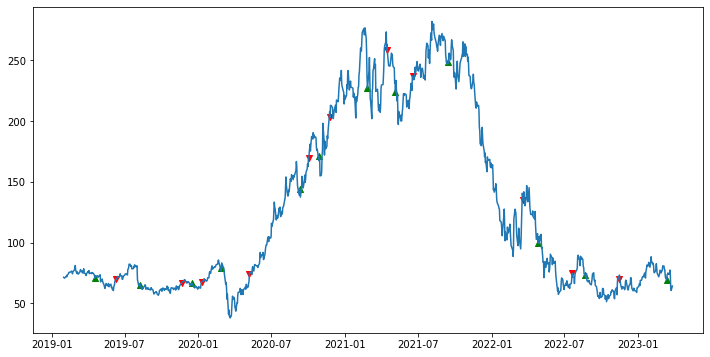

In [25]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.scatter(df.loc[buydates].index, df.loc[buydates].Close, marker = '^', c = 'g')
plt.scatter(df.loc[selldates].index, df.loc[selldates].Close, marker = 'v', c = 'r')
